In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Load in csv files as a dictionary 

In [17]:
import os
import pandas as pd

folder_path = 'csv'

# Get a list of all csv files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty dictionary to store the dataframes
data_dict = {}

# Loop through each csv file and load it into a dataframe
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data_dict[file] = df

# Now the data_dict contains all the dataframes, with the key being the filename

In [430]:
patients_df = data_dict["patients.csv"]


# Choose single patient and load their data into a separate dictionary

In [431]:
conditions_df = data_dict["conditions.csv"]
single_patient_name = conditions_df.PATIENT[1] 

In [432]:
single_patient_dict = {}

for name, df in data_dict.items():
    try:
        single_patient_dict[name] = df[df.PATIENT==single_patient_name]
    except:
        print(name, "has no such column")

organizations.csv has no such column
patients.csv has no such column
payers.csv has no such column
providers.csv has no such column


# For all dataframes with a description column, count the number of occurences and plot up as a bar chart

In [433]:
df = single_patient_dict["conditions.csv"]

allergies.csv


<ipython-input-434-152030ba81a9>:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(counts, labels=counts.index)


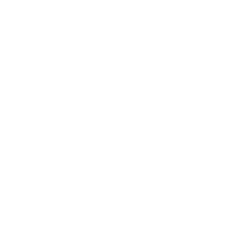

careplans.csv


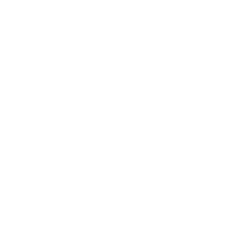

conditions.csv


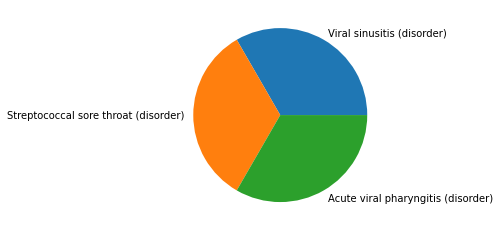

devices.csv


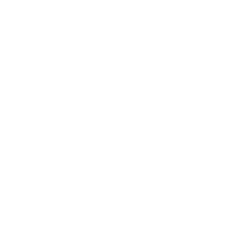

encounters.csv


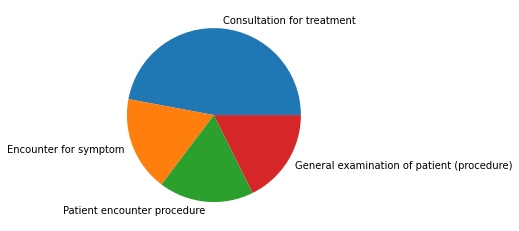

imaging_studies.csv
imaging_studies.csv has no description column


,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION


immunizations.csv


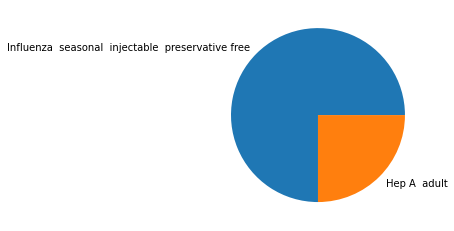

medications.csv


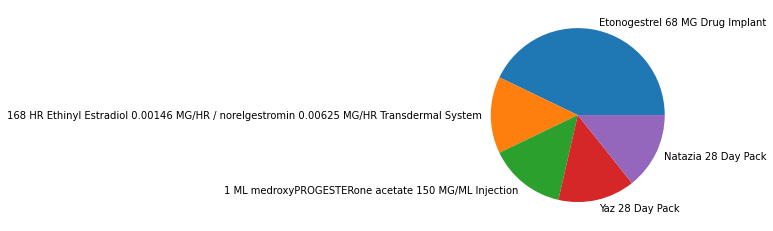

observations.csv


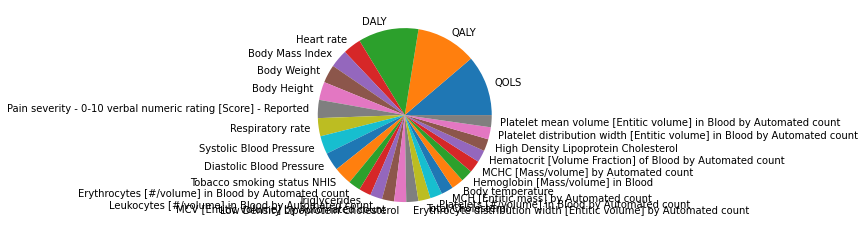

payer_transitions.csv
payer_transitions.csv has no description column


,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
2,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,1995,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Guardian
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1996,1996,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
4,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1997,1999,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
5,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2000,2000,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
6,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2001,2002,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
7,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2003,2003,047f6ec3-6215-35eb-9608-f9dda363a44c,Self
8,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2004,2005,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
9,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2006,2006,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Self


procedures.csv


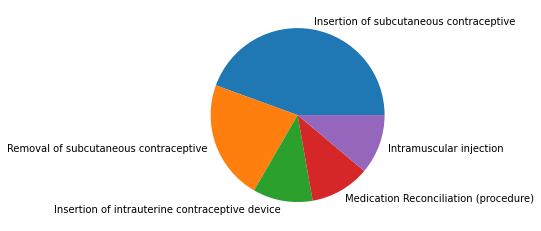

supplies.csv


<ipython-input-434-152030ba81a9>:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(counts, labels=counts.index)


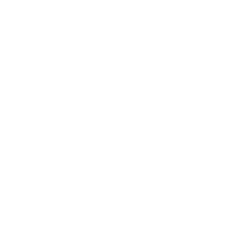

In [434]:
for name, df in single_patient_dict.items():
    try:
        print(name)
        #temp = df[["START", "STOP", "DESCRIPTION"]]
        #display(temp.reset_index(drop=True))
#         sns.countplot(x='DESCRIPTION', data=df)
        
#         plt.xticks(rotation=45)
#         plt.show()
        counts = df['DESCRIPTION'].value_counts()
        plt.pie(counts, labels=counts.index)
        #Add text labels for the counts
#         for i, count in enumerate(counts):
#             plt.text(1.2, 1.1-i*0.2, f'{counts.index[i]}: {count}', color='black', fontsize=20)
        #plt.savefig(name+".png")
        plt.show()
        
    except:
        print(name, "has no description column")
        display(df)
    #display(df)

In [436]:
encounters_df = single_patient_dict["encounters.csv"]

In [437]:
encounters_df['START'] = pd.to_datetime(encounters_df['START'])
sum_by_year_encounter = encounters_df.groupby(encounters_df['START'].dt.year)['TOTAL_CLAIM_COST'].sum()


<ipython-input-437-53bf3f006fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encounters_df['START'] = pd.to_datetime(encounters_df['START'])


In [439]:
import pandas as pd


# Create a new index with all years
all_years = pd.RangeIndex(start=sum_by_year_medication.index.min(), stop=sum_by_year_medication.index.max()+1)

# Reindex the series with the complete index and fill missing values with zero
s = sum_by_year_medication.reindex(all_years, fill_value=0)

print(s)

2010    8124.96
2011    7489.08
2012     519.84
2013       0.00
2014    7488.96
2015       0.00
2016       0.00
2017     470.40
2018     467.52
2019       0.00
2020      69.75
Name: TOTALCOST, dtype: float64


In [440]:
import pandas as pd


# Create a new index with all years
all_years = pd.RangeIndex(start=sum_by_year_encounter.index.min(), stop=sum_by_year_encounter.index.max()+1)

# Reindex the series with the complete index and fill missing values with zero
t = sum_by_year_encounter.reindex(all_years, fill_value=0)

In [446]:
all_years = pd.RangeIndex(start=sum_by_year.index.min()-1, stop=sum_by_year.index.max()+1)

pro = sum_by_year.reindex(all_years, fill_value=0)


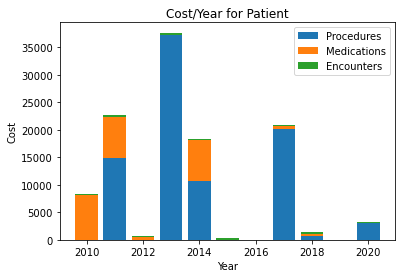

In [450]:
import pandas as pd
import matplotlib.pyplot as plt


plt.bar(pro.index, pro, label="Procedures")
plt.bar(s.index, s, bottom=pro,label="Medications")
plt.bar(t.index, t, bottom=s+pro, label="Encounters")
plt.legend()
plt.ylabel("Cost")
plt.xlabel("Year")
plt.title("Cost/Year for Patient")
plt.savefig("cost_patient")
plt.show()

# Group the DESCRIPTION by year and count the number of occurrences and show as a table

In [453]:
for name, df in single_patient_dict.items():
    try:
        temp = df.copy()
        temp["START"] = pd.to_datetime(temp['START'])
        temp['year'] = temp["START"].dt.year
        grouped_df = temp.groupby(['year', 'DESCRIPTION']).size().reset_index(name='count')
        pivoted_df = grouped_df.pivot(index='year', columns='DESCRIPTION', values='count')
        pivoted_df = pivoted_df.fillna(0)
        table = pivoted_df.style.format('{:.1f}')
        # Display the table in Jupyter notebook
        display(table)
        # sns.heatmap(pivoted_df, cmap='Blues')
        # plt.xlabel('DESCRIPTION')
        # plt.ylabel('Year')
        # plt.title('Count of Examinations by Year')
        # plt.show()
    except:
        print(name, "has no description column")
        display(df)
        
    #display(df)

IndexError: list index out of range

IndexError: list index out of range

DESCRIPTION,Acute viral pharyngitis (disorder),Streptococcal sore throat (disorder),Viral sinusitis (disorder)
year,,,
2011,1.0,0.0,1.0
2015,0.0,1.0,0.0


IndexError: list index out of range

DESCRIPTION,Consultation for treatment,Encounter for symptom,General examination of patient (procedure),Patient encounter procedure
year,,,,
2010,1.0,0.0,0.0,0.0
2011,1.0,2.0,0.0,0.0
2012,1.0,0.0,1.0,0.0
2013,1.0,0.0,0.0,2.0
2014,1.0,0.0,0.0,0.0
2015,0.0,1.0,1.0,0.0
2017,1.0,0.0,0.0,1.0
2018,1.0,0.0,1.0,0.0
2020,1.0,0.0,0.0,0.0


imaging_studies.csv has no description column


,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION


immunizations.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
9,2012-08-12T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,140,Influenza seasonal injectable preservative ...,140.52
14,2015-08-16T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,879eac70-04cb-4cfc-b10b-4bfeae3940e0,140,Influenza seasonal injectable preservative ...,140.52
21,2018-06-03T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,397988ab-1f49-4ebd-b3b3-d970b266a5c8,140,Influenza seasonal injectable preservative ...,140.52
22,2018-06-03T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,397988ab-1f49-4ebd-b3b3-d970b266a5c8,52,Hep A adult,140.52


DESCRIPTION,1 ML medroxyPROGESTERone acetate 150 MG/ML Injection,168 HR Ethinyl Estradiol 0.00146 MG/HR / norelgestromin 0.00625 MG/HR Transdermal System,Etonogestrel 68 MG Drug Implant,Natazia 28 Day Pack,Yaz 28 Day Pack
year,,,,,
2010,0.0,0.0,1.0,0.0,0.0
2011,0.0,0.0,1.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,1.0
2014,0.0,0.0,1.0,0.0,0.0
2017,0.0,1.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,1.0,0.0
2020,1.0,0.0,0.0,0.0,0.0


observations.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
8,2011-11-17T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,8310-5,Body temperature,37.1,Cel,numeric
58,2012-08-12T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,8302-2,Body Height,162.5,cm,numeric
60,2012-08-12T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
62,2012-08-12T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,29463-7,Body Weight,77.4,kg,numeric
64,2012-08-12T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,39156-5,Body Mass Index,29.3,kg/m2,numeric
...,...,...,...,...,...,...,...,...
431,2015-05-28T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric
432,2016-05-28T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric
434,2017-05-28T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric
436,2018-05-28T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric


payer_transitions.csv has no description column


,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
2,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,1995,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Guardian
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1996,1996,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
4,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1997,1999,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
5,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2000,2000,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
6,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2001,2002,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
7,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2003,2003,047f6ec3-6215-35eb-9608-f9dda363a44c,Self
8,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2004,2005,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
9,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2006,2006,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Self


procedures.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
9,2013-04-23T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,e228c87b-b64e-4e3e-a40c-d93fc0360d45,65200003,Insertion of intrauterine contraceptive device,8726.45,NaN,NaN
10,2013-05-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d18adaa5-dd48-4481-a6f6-72dd928198f2,301807007,Removal of subcutaneous contraceptive,12914.35,NaN,NaN
11,2013-05-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d18adaa5-dd48-4481-a6f6-72dd928198f2,169553002,Insertion of subcutaneous contraceptive,15645.91,NaN,NaN
12,2014-04-23T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9cd4cb2c-458b-401c-836d-d600e7b480c3,169553002,Insertion of subcutaneous contraceptive,10637.88,NaN,NaN
14,2017-05-21T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,046399ee-09e9-41ec-b74e-12ca57252f7c,301807007,Removal of subcutaneous contraceptive,8631.76,NaN,NaN
16,2017-05-21T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,046399ee-09e9-41ec-b74e-12ca57252f7c,169553002,Insertion of subcutaneous contraceptive,11556.96,NaN,NaN
18,2018-06-03T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,397988ab-1f49-4ebd-b3b3-d970b266a5c8,430193006,Medication Reconciliation (procedure),620.16,NaN,NaN
19,2020-03-22T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,19e04f6c-8a80-4901-aa20-54ec7da8cced,76601001,Intramuscular injection,3001.57,NaN,NaN


supplies.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY


In [35]:
# Plot cost of medications

In [454]:
medications_df

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05 00:26:23+00:00,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30 00:26:23+00:00,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24 00:26:23+00:00,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
7,2014-04-23 00:26:23+00:00,2015-04-18T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,9cd4cb2c-458b-401c-836d-d600e7b480c3,389221,Etonogestrel 68 MG Drug Implant,624.08,0.0,12,7488.96,NaN,NaN
9,2017-04-07 00:26:23+00:00,2018-04-02T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,c60f2369-c096-441f-bf6c-00248e23cfd2,1534809,168 HR Ethinyl Estradiol 0.00146 MG/HR / norel...,39.20,0.0,12,470.40,NaN,NaN
10,2018-04-02 00:26:23+00:00,2019-03-28T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,eeb353a4-6c2c-459b-b834-3bd3687182e3,978950,Natazia 28 Day Pack,38.96,0.0,12,467.52,NaN,NaN
11,2020-03-22 00:26:23+00:00,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,19e04f6c-8a80-4901-aa20-54ec7da8cced,1000126,1 ML medroxyPROGESTERone acetate 150 MG/ML Inj...,69.75,0.0,1,69.75,NaN,NaN


In [455]:
sum_by_year_medication = medications_df.groupby(medications_df['START'].dt.year)['TOTALCOST'].sum()


<ipython-input-456-f5777e6b0dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medications_df["START"] = pd.to_datetime(medications_df["START"])


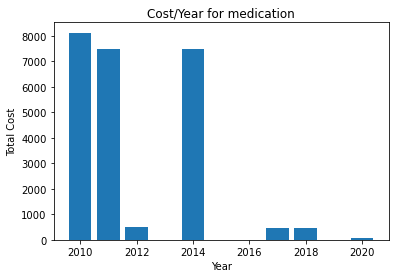

In [456]:
medications_df = single_patient_dict["medications.csv"]
medications_df["START"] = pd.to_datetime(medications_df["START"])
plt.bar(sum_by_year_medication.index, sum_by_year_medication)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.title('Cost/Year for medication')
# Show the plot
plt.savefig("medication_cost.png")

# Plot base cost of procedures

In [457]:
procedures_df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
9,2013-04-23 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,e228c87b-b64e-4e3e-a40c-d93fc0360d45,65200003,Insertion of intrauterine contraceptive device,8726.45,NaN,NaN
10,2013-05-19 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d18adaa5-dd48-4481-a6f6-72dd928198f2,301807007,Removal of subcutaneous contraceptive,12914.35,NaN,NaN
11,2013-05-19 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d18adaa5-dd48-4481-a6f6-72dd928198f2,169553002,Insertion of subcutaneous contraceptive,15645.91,NaN,NaN
12,2014-04-23 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9cd4cb2c-458b-401c-836d-d600e7b480c3,169553002,Insertion of subcutaneous contraceptive,10637.88,NaN,NaN
14,2017-05-21 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,046399ee-09e9-41ec-b74e-12ca57252f7c,301807007,Removal of subcutaneous contraceptive,8631.76,NaN,NaN
16,2017-05-21 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,046399ee-09e9-41ec-b74e-12ca57252f7c,169553002,Insertion of subcutaneous contraceptive,11556.96,NaN,NaN
18,2018-06-03 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,397988ab-1f49-4ebd-b3b3-d970b266a5c8,430193006,Medication Reconciliation (procedure),620.16,NaN,NaN
19,2020-03-22 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,19e04f6c-8a80-4901-aa20-54ec7da8cced,76601001,Intramuscular injection,3001.57,NaN,NaN


In [458]:
sum_by_year = procedures_df.groupby(procedures_df['DATE'].dt.year)['BASE_COST'].sum()

# Print the result
print(sum_by_year)

DATE
2011    14896.56
2013    37286.71
2014    10637.88
2017    20188.72
2018      620.16
2020     3001.57
Name: BASE_COST, dtype: float64


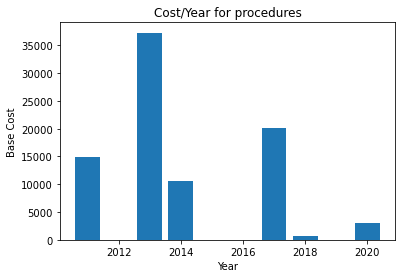

In [459]:
procedures_df = single_patient_dict["procedures.csv"].copy()
procedures_df["DATE"] = pd.to_datetime(procedures_df["DATE"])
# Create a bar chart
plt.bar(sum_by_year.index,sum_by_year)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Base Cost')
plt.title('Cost/Year for procedures')
# Show the plot
#plt.show()
plt.savefig("cost_procedures.png")

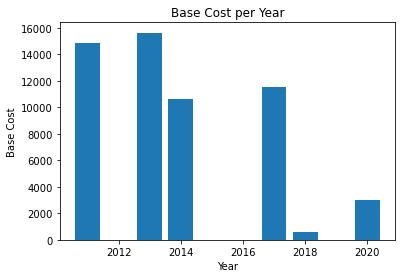

In [460]:
procedures_df = single_patient_dict["procedures.csv"].copy()
procedures_df["DATE"] = pd.to_datetime(procedures_df["DATE"])
# Create a bar chart
plt.bar(procedures_df["DATE"].dt.year, procedures_df["BASE_COST"])

# Add labels and title>
plt.xlabel('Year')
plt.ylabel('Base Cost')
plt.title('Base Cost per Year')
# Show the plot
plt.show()

# Showing table of the files with DATE and DESCRIPTION

In [461]:
for name, df in single_patient_dict.items():
    try:
        temp = df.copy()
        temp["DATE"] = pd.to_datetime(temp['DATE'])
        temp['year'] = temp["DATE"].dt.year
        grouped_df = temp.groupby(['year', 'DESCRIPTION']).size().reset_index(name='count')
        pivoted_df = grouped_df.pivot(index='year', columns='DESCRIPTION', values='count')
        pivoted_df = pivoted_df.fillna(0)
        table = pivoted_df.style.format('{:.1f}')
        # Display the table in Jupyter notebook
        display(table)
        # sns.heatmap(pivoted_df, cmap='Blues')
        # plt.xlabel('DESCRIPTION')
        # plt.ylabel('Year')
        # plt.title('Count of Examinations by Year')
        # plt.show()
    except:
        print(name, "has no description column")
        #display(df)
        
    #display(df)



allergies.csv has no description column
careplans.csv has no description column
conditions.csv has no description column
devices.csv has no description column
encounters.csv has no description column
imaging_studies.csv has no description column


DESCRIPTION,Hep A adult,Influenza seasonal injectable preservative free
year,,
2012,0.0,1.0
2015,0.0,1.0
2018,1.0,1.0


medications.csv has no description column


DESCRIPTION,Body Height,Body Mass Index,Body Weight,Body temperature,DALY,Diastolic Blood Pressure,Erythrocyte distribution width [Entitic volume] by Automated count,Erythrocytes [#/volume] in Blood by Automated count,Heart rate,Hematocrit [Volume Fraction] of Blood by Automated count,Hemoglobin [Mass/volume] in Blood,High Density Lipoprotein Cholesterol,Leukocytes [#/volume] in Blood by Automated count,Low Density Lipoprotein Cholesterol,MCH [Entitic mass] by Automated count,MCHC [Mass/volume] by Automated count,MCV [Entitic volume] by Automated count,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Platelet distribution width [Entitic volume] in Blood by Automated count,Platelet mean volume [Entitic volume] in Blood by Automated count,Platelets [#/volume] in Blood by Automated count,QALY,QOLS,Respiratory rate,Systolic Blood Pressure,Tobacco smoking status NHIS,Total Cholesterol,Triglycerides
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2012,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2015,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2018,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


payer_transitions.csv has no description column


DESCRIPTION,Insertion of intrauterine contraceptive device,Insertion of subcutaneous contraceptive,Intramuscular injection,Medication Reconciliation (procedure),Removal of subcutaneous contraceptive
year,,,,,
2011,0.0,1.0,0.0,0.0,0.0
2013,1.0,1.0,0.0,0.0,1.0
2014,0.0,1.0,0.0,0.0,0.0
2017,0.0,1.0,0.0,0.0,1.0
2018,0.0,0.0,0.0,1.0,0.0
2020,0.0,0.0,1.0,0.0,0.0


IndexError: list index out of range

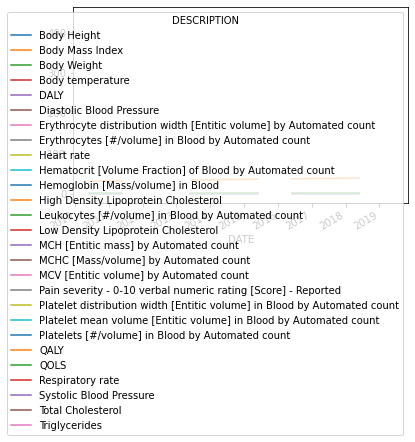

In [462]:
observations_df = single_patient_dict["observations.csv"].copy()
observations_df = observations_df.drop(observations_df[observations_df.VALUE=="Never smoker"].index)
observations_df["VALUE"] = pd.to_numeric(observations_df["VALUE"])
observations_df['DATE'] = pd.to_datetime(observations_df['DATE'])
pivot_df = observations_df.pivot(index='DATE', columns='DESCRIPTION', values='VALUE')

# Plot the pivoted dataframe
pivot_df.plot()

# Add axis labels and a title
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Values Over Time for Each Category')

# Show the plot
plt.show()

In [468]:
x = df.columns[[0,1,2,5 , 25, 26]]

IndexError: index 25 is out of bounds for axis 0 with size 6

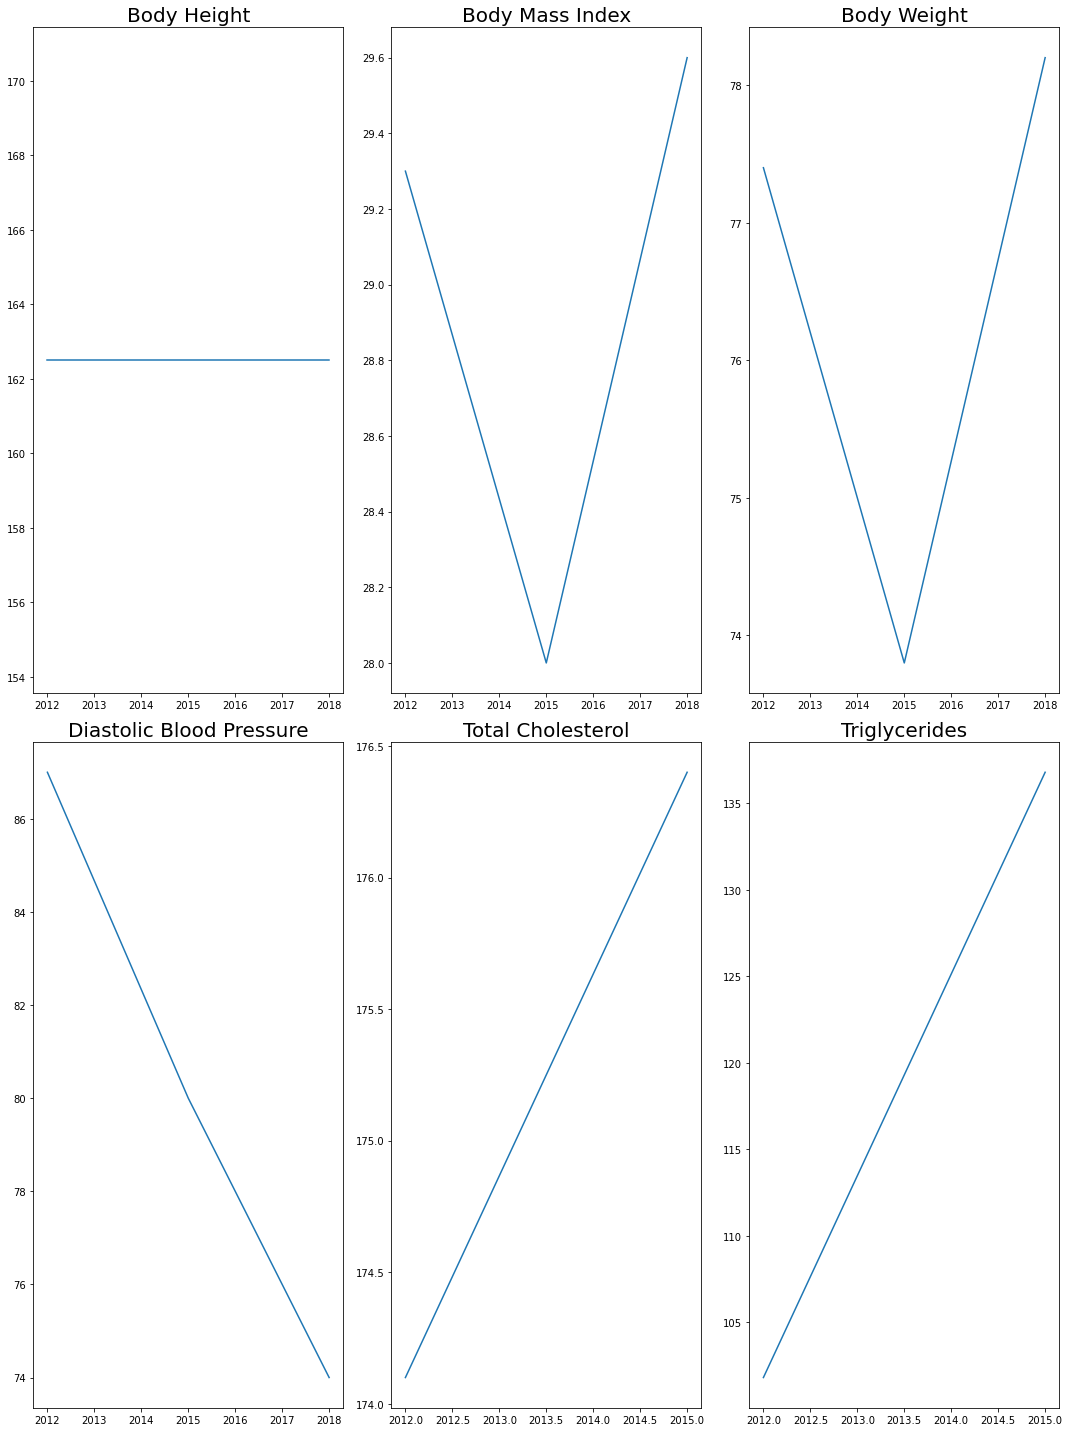

In [469]:
# Define the number of columns in the figure
num_cols = 3

# Create the figure and subplots
fig, axs = plt.subplots(nrows=len(x)//num_cols, ncols=num_cols, figsize=(15, 20))

df = pivot_df.copy()
# Plot each column in a separate subplot
for i, column in enumerate(x):
    
    row = i // num_cols
    col = i % num_cols
    temp = df[column].dropna()
    axs[row, col].plot(temp.index.year, temp.values)
    
    if len(column) > 25:
        axs[row, col].set_title(column, fontsize = 8)
    else:
        axs[row, col].set_title(column, fontsize = 20)
        
    
# Remove any unused subplots
for i in range(len(df.columns), axs.size):
    fig.delaxes(axs.flatten()[i])

# Show the resulting figure
plt.tight_layout()

#plt.show()
fig.savefig('my_plot2.png')

# Exploring patients with the same conditions

In [470]:
temp

DATE
2012-08-12 00:26:23+00:00    101.8
2015-08-16 00:26:23+00:00    136.8
Name: Triglycerides, dtype: float64

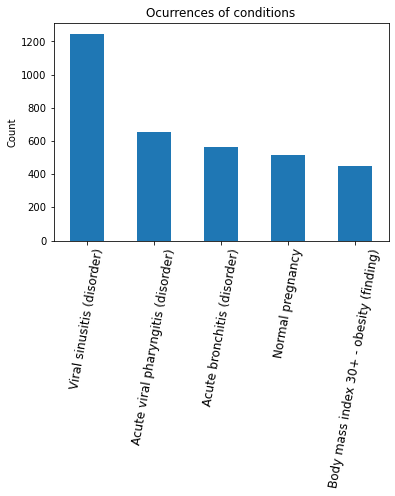

In [471]:
counts_conditions = conditions_df.DESCRIPTION.value_counts()


#counts_conditions[0:3].plot(kind='bar')
# set the labels and title
temp = counts_conditions[0:5]
ax = temp.plot(kind='bar')

# set the labels and title
#ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Ocurrences of conditions')

# set the font size of the x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=80,fontsize=12)
plt.savefig("common_conditions.png")
# show the plot
plt.show()

# How the conditions are treated

In [472]:
careplan_df = data_dict["careplans.csv"]

In [473]:
top_3_conditions = temp.index

In [474]:
for condition in top_3_conditions:
    display(careplan_df[careplan_df.REASONDESCRIPTION == condition])
    print(np.unique(careplan_df[careplan_df.REASONDESCRIPTION == condition].DESCRIPTION))

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION


[]


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION


[]


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,d2500b8c-e830-433a-8b9d-368d30741520,2010-01-23,2012-01-23,034e9e3b-2def-4559-bb2a-7850888ae060,d0c40d10-8d87-447e-836e-99d26ad52ea5,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
1,07d9ddd8-dfa1-4e43-9bfe-39f63f4ace15,2011-05-13,2011-08-02,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
2,a3bb6e99-3b99-44b3-974c-e230b4511b5c,2011-12-31,2012-11-30,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3,9f5284b7-425a-486a-b36e-ab818c018f2f,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
5,7855c5ad-642b-4e64-b4d6-01265534ea84,2019-04-23,2019-05-07,10339b10-3cd1-4ac3-ac13-ec26728cb592,27ff7518-6d93-4308-8a1d-d2dfb02c0c58,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
...,...,...,...,...,...,...,...,...,...
3455,0714eaaf-0e70-40f4-a02d-295515533864,2015-10-08,2016-03-26,35e1afdd-e938-441d-b54e-db15db0bbcfd,09890dae-3790-427d-91af-0c3209908598,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3456,37513029-364a-446d-98ab-625c7b86cd7d,2010-03-03,2010-12-04,92408d94-8b50-4e26-a6e1-42ee77823db6,91069a03-85ea-4df3-92ff-3f9c88f8106c,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3468,146cb47e-fc8c-4fa2-9531-e5fce7f4092a,2011-04-14,2012-01-03,09867b02-24b8-4896-b38b-86782dd64ef1,54737915-7186-4daa-b55d-3c20e2da3395,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3472,96e47f30-b3ad-4fd0-8899-ba62966e97d9,2011-07-21,2011-09-27,023a7d29-32b3-4db5-89c8-b88bd7582ec0,dac205d1-66ff-4619-b80d-766dde09eaa2,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)


['Respiratory therapy']


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
11,85930b9d-58b9-4c7a-bb16-b05ccb001ae4,2018-05-26,2019-01-05,b58731cc-2d8b-4c2d-b327-4cab771af3ef,42cf4e99-a963-4fcc-a3c6-17bcc82876c1,134435003,Routine antenatal care,72892002.0,Normal pregnancy
13,3ec84992-d0a6-4c63-a46e-14a0b177fc6d,2010-09-01,2011-03-30,bfb6537b-535a-4f31-9a56-073220f96a17,910cf468-36e3-4468-9606-13d2b70c19ef,134435003,Routine antenatal care,72892002.0,Normal pregnancy
14,2dd99f9e-4b2f-45e4-8fd0-b5305978fd98,2017-09-13,2018-04-18,bfb6537b-535a-4f31-9a56-073220f96a17,2f998592-fdec-484a-a032-ab757e0a5106,134435003,Routine antenatal care,72892002.0,Normal pregnancy
17,5603730e-674d-44a0-a9b9-d631c9a7d930,2014-02-26,2014-10-01,83719bd7-7a41-4c87-93f9-c5de4db6a14a,3038b9f2-9e35-4311-923a-1306b873636b,134435003,Routine antenatal care,72892002.0,Normal pregnancy
18,22638e08-6c69-4a93-b073-f248cd863c77,2015-05-27,2016-01-06,83719bd7-7a41-4c87-93f9-c5de4db6a14a,a0c25b20-c3d6-462f-92b6-4f4e557851d7,134435003,Routine antenatal care,72892002.0,Normal pregnancy
...,...,...,...,...,...,...,...,...,...
3426,be71c5ee-efea-41c6-a59a-ea26cc5196ad,1986-01-09,1986-08-21,9dfbf6ed-2378-4c27-9ff7-7e5c0619c236,230120fb-04b8-49f0-9ec8-a97c1512945d,134435003,Routine antenatal care,72892002.0,Normal pregnancy
3427,7c64fb02-cc90-4fe1-80a3-a4b73cedd857,1987-02-19,1987-10-01,9dfbf6ed-2378-4c27-9ff7-7e5c0619c236,8dbf4896-e73e-44f9-ba86-ca4e88f09104,134435003,Routine antenatal care,72892002.0,Normal pregnancy
3428,b75424a1-a6aa-4550-a632-d4b23b847f39,1994-07-07,1995-02-09,9dfbf6ed-2378-4c27-9ff7-7e5c0619c236,c72485bd-9ab9-4d76-80e7-81e6c3d08e44,134435003,Routine antenatal care,72892002.0,Normal pregnancy
3429,5e12cebf-92f0-4207-a49b-a61879e92b3e,1997-09-04,NaN,9dfbf6ed-2378-4c27-9ff7-7e5c0619c236,f24a2c4a-56f3-41d3-9655-0c936145dbef,134435003,Routine antenatal care,72892002.0,Normal pregnancy


['Routine antenatal care']


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION


[]


allergies.csv


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen
...,...,...,...,...,...,...
592,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,418689008,Allergy to grass pollen
593,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,419263009,Allergy to tree pollen
594,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,91930004,Allergy to eggs
595,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,91935009,Allergy to peanuts


allergies.csv has no description column


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen
...,...,...,...,...,...,...
592,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,418689008,Allergy to grass pollen
593,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,419263009,Allergy to tree pollen
594,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,91930004,Allergy to eggs
595,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,91935009,Allergy to peanuts


careplans.csv


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,d2500b8c-e830-433a-8b9d-368d30741520,2010-01-23,2012-01-23,034e9e3b-2def-4559-bb2a-7850888ae060,d0c40d10-8d87-447e-836e-99d26ad52ea5,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
1,07d9ddd8-dfa1-4e43-9bfe-39f63f4ace15,2011-05-13,2011-08-02,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
2,a3bb6e99-3b99-44b3-974c-e230b4511b5c,2011-12-31,2012-11-30,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3,9f5284b7-425a-486a-b36e-ab818c018f2f,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
4,47ede16c-c216-4f81-a16b-0e858de9cdc3,2017-01-22,2017-02-12,10339b10-3cd1-4ac3-ac13-ec26728cb592,4ec8d55b-05fc-42a5-bfa3-1e233874a362,225358003,Wound care,284551006.0,Laceration of foot
...,...,...,...,...,...,...,...,...,...
3478,5998d466-9922-4a35-9277-7a902352ce48,1983-09-08,1983-09-29,fca3178e-fb68-41c3-8598-702d3ca68b96,9e9670e5-da7f-4111-98a6-21d5e0aadd86,91251008,Physical therapy procedure,70704007.0,Sprain of wrist
3479,3de3b598-ca98-4b98-947a-34e3e86630e6,1984-09-23,1984-11-22,fca3178e-fb68-41c3-8598-702d3ca68b96,8d7d70be-467d-430f-8497-25aa2c1276b8,385691007,Fracture care,263102004.0,Fracture subluxation of wrist
3480,6f02c458-e04f-429d-99ce-72626d87952d,1987-09-27,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,48ea35a8-37cd-41d2-86c1-7785b514c453,735984001,Heart failure self management plan,88805009.0,Chronic congestive heart failure (disorder)
3481,243de451-1e53-40fc-b4ae-e0ea730e4a0d,1990-03-15,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,aaee3543-3edb-40af-a276-3bb027cac0dc,736353004,Inpatient care plan (record artifact),NaN,NaN


REASONDESCRIPTION,Acute bronchitis (disorder),Normal pregnancy
DESCRIPTION,,
Respiratory therapy,633,0
Routine antenatal care,0,397


conditions.csv


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,duration
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),NaT
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),7 days
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),10 days
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder),14 days
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder),8 days
...,...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),NaT
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),NaT
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,NaT
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder),7 days


conditions.csv has no description column


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,duration
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),NaT
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),7 days
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),10 days
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder),14 days
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder),8 days
...,...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),NaT
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),NaT
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,NaT
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder),7 days


devices.csv


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2001-07-04T08:42:44Z,NaN,d49f748f-928d-40e8-92c8-73e4c5679711,2500b8bd-dc98-44ef-a252-22dc4f81d61b,72506001,Implantable defibrillator device (physical ob...,(01)67677988606464(11)010613(17)260628(10)2882...
1,2010-10-24T05:28:51Z,NaN,e05dd037-e45f-434a-946d-5c9076a2f596,83cda5b1-4653-4327-a81c-14c4af434e95,72506001,Implantable defibrillator device (physical ob...,(01)20180595258346(11)101003(17)351018(10)1391...
2,2017-06-04T11:11:47Z,NaN,0f5646bc-a156-4ec0-9252-5b592e3d3184,7302a9ce-5845-456d-af2e-bca7a1fc387f,72506001,Implantable defibrillator device (physical ob...,(01)87988924478445(11)170514(17)420529(10)4143...
3,1989-01-17T18:12:03Z,NaN,44c8b4c8-4457-4ba0-94b6-285ef327a249,7db01f61-e637-4e41-9067-0168524c991f,705643001,Coronary artery stent (physical object),(01)30831895165484(11)881227(17)140111(10)7597...
4,1973-07-19T04:25:46Z,NaN,89752052-a38b-45f0-a590-3950bbb67bec,e73fe5e1-1b13-4368-b52f-673cbf1f3540,72506001,Implantable defibrillator device (physical ob...,(01)71767722231489(11)730628(17)980713(10)6519...
...,...,...,...,...,...,...,...
73,1997-01-27T14:31:51Z,NaN,9bebd912-a12b-4a83-a02c-f510587246df,b9bca2fc-a297-49e8-a030-75cff5d83737,72506001,Implantable defibrillator device (physical ob...,(01)18759008756217(11)970106(17)220121(10)5934...
74,1994-02-08T13:04:22Z,NaN,9c4c1885-35af-48b9-a09f-4ea448d40d75,c399d6f4-b549-46c6-b0e8-a8c0398f6db9,706004007,Implantable cardiac pacemaker (physical object),(01)78045789271756(11)940118(17)190202(10)5321...
75,2018-11-04T07:02:15Z,NaN,2f76733b-933c-4cc5-aea2-53799158c8cc,86dd4b03-b0ca-41ee-824c-7fb1e9da953e,706004007,Implantable cardiac pacemaker (physical object),(01)77289394758969(11)181014(17)431029(10)3787...
76,1955-02-01T13:04:22Z,NaN,87f05059-de42-4630-a35b-edb53d880640,231bb53a-7698-454f-b348-bebc2cc17427,705643001,Coronary artery stent (physical object),(01)81833763907543(11)550111(17)800126(10)1912...


devices.csv has no description column


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2001-07-04T08:42:44Z,NaN,d49f748f-928d-40e8-92c8-73e4c5679711,2500b8bd-dc98-44ef-a252-22dc4f81d61b,72506001,Implantable defibrillator device (physical ob...,(01)67677988606464(11)010613(17)260628(10)2882...
1,2010-10-24T05:28:51Z,NaN,e05dd037-e45f-434a-946d-5c9076a2f596,83cda5b1-4653-4327-a81c-14c4af434e95,72506001,Implantable defibrillator device (physical ob...,(01)20180595258346(11)101003(17)351018(10)1391...
2,2017-06-04T11:11:47Z,NaN,0f5646bc-a156-4ec0-9252-5b592e3d3184,7302a9ce-5845-456d-af2e-bca7a1fc387f,72506001,Implantable defibrillator device (physical ob...,(01)87988924478445(11)170514(17)420529(10)4143...
3,1989-01-17T18:12:03Z,NaN,44c8b4c8-4457-4ba0-94b6-285ef327a249,7db01f61-e637-4e41-9067-0168524c991f,705643001,Coronary artery stent (physical object),(01)30831895165484(11)881227(17)140111(10)7597...
4,1973-07-19T04:25:46Z,NaN,89752052-a38b-45f0-a590-3950bbb67bec,e73fe5e1-1b13-4368-b52f-673cbf1f3540,72506001,Implantable defibrillator device (physical ob...,(01)71767722231489(11)730628(17)980713(10)6519...
...,...,...,...,...,...,...,...
73,1997-01-27T14:31:51Z,NaN,9bebd912-a12b-4a83-a02c-f510587246df,b9bca2fc-a297-49e8-a030-75cff5d83737,72506001,Implantable defibrillator device (physical ob...,(01)18759008756217(11)970106(17)220121(10)5934...
74,1994-02-08T13:04:22Z,NaN,9c4c1885-35af-48b9-a09f-4ea448d40d75,c399d6f4-b549-46c6-b0e8-a8c0398f6db9,706004007,Implantable cardiac pacemaker (physical object),(01)78045789271756(11)940118(17)190202(10)5321...
75,2018-11-04T07:02:15Z,NaN,2f76733b-933c-4cc5-aea2-53799158c8cc,86dd4b03-b0ca-41ee-824c-7fb1e9da953e,706004007,Implantable cardiac pacemaker (physical object),(01)77289394758969(11)181014(17)431029(10)3787...
76,1955-02-01T13:04:22Z,NaN,87f05059-de42-4630-a35b-edb53d880640,231bb53a-7698-454f-b348-bebc2cc17427,705643001,Coronary artery stent (physical object),(01)81833763907543(11)550111(17)800126(10)1912...


encounters.csv


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23 17:45:28+00:00,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27 12:58:08+00:00,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53341,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,2015-06-20 17:27:52+00:00,2015-06-20T17:57:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
53342,59727285-d30f-44e2-bcda-eac21ce07269,2016-06-25 17:27:52+00:00,2016-06-25T17:42:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
53343,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,2017-07-01 17:27:52+00:00,2017-07-01T17:57:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
53344,5529a0d5-a24c-42b4-a32a-729e4d1f19ef,2018-07-07 17:27:52+00:00,2018-07-07T17:42:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


REASONDESCRIPTION,Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Normal pregnancy,Viral sinusitis (disorder)
DESCRIPTION,,,,
Encounter for symptom,690,691,0,1378
Obstetric emergency hospital admission,0,0,299,0
Patient-initiated encounter,0,0,94,0
Prenatal initial visit,0,0,801,0
Prenatal visit,0,0,2585,0


imaging_studies.csv


,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,d3e49b38-7634-4416-879d-7bc68bf3e7df,2014-07-08T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,3a36836d-da25-4e73-808b-972b669b7e4e,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,46baf530-4941-40ab-8219-685a08fd9086,2014-01-22T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,33b71e4b-0690-4fe9-897a-dc3b2ff9215c,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
2,b8fb8a6e-a2f5-46c9-8b3f-a35aa982efcd,2001-12-01T02:08:27Z,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,e42d1046-568d-46c2-b0a5-d910b2f3bd1d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
3,10c8a016-4504-4653-bddf-2dd3610886c8,2004-07-03T20:46:46Z,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,323fca87-817f-4d58-8486-ba92ea739399,51299004,Clavicle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
4,4221534c-d379-4c6b-a22e-d7eae3fa2609,2017-02-08T08:42:44Z,d49f748f-928d-40e8-92c8-73e4c5679711,cfef48b3-b769-4794-a3e7-f57f7ba8d387,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
...,...,...,...,...,...,...,...,...,...,...
850,9148d80c-9ba5-4bcd-8c31-8eebb32d33d0,1988-03-25T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,fcadea12-7962-442d-b65b-8c28e16ab971,51185008,Thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
851,904779de-bcc8-411e-88ec-92bacecfe43a,1989-03-20T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,c791e651-ee32-4be5-b74b-c873f38b2551,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
852,cb3552e4-4959-4c4d-b8ba-36d71608e32e,1990-03-15T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,bc5ea274-ad81-495a-adcb-276b69a7a120,51185008,Thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
853,d5203a3f-75da-48a6-b750-8c5fa59ed657,1990-03-15T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,aaee3543-3edb-40af-a276-3bb027cac0dc,261179002,Thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage


imaging_studies.csv has no description column


,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,d3e49b38-7634-4416-879d-7bc68bf3e7df,2014-07-08T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,3a36836d-da25-4e73-808b-972b669b7e4e,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,46baf530-4941-40ab-8219-685a08fd9086,2014-01-22T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,33b71e4b-0690-4fe9-897a-dc3b2ff9215c,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
2,b8fb8a6e-a2f5-46c9-8b3f-a35aa982efcd,2001-12-01T02:08:27Z,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,e42d1046-568d-46c2-b0a5-d910b2f3bd1d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
3,10c8a016-4504-4653-bddf-2dd3610886c8,2004-07-03T20:46:46Z,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,323fca87-817f-4d58-8486-ba92ea739399,51299004,Clavicle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
4,4221534c-d379-4c6b-a22e-d7eae3fa2609,2017-02-08T08:42:44Z,d49f748f-928d-40e8-92c8-73e4c5679711,cfef48b3-b769-4794-a3e7-f57f7ba8d387,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
...,...,...,...,...,...,...,...,...,...,...
850,9148d80c-9ba5-4bcd-8c31-8eebb32d33d0,1988-03-25T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,fcadea12-7962-442d-b65b-8c28e16ab971,51185008,Thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
851,904779de-bcc8-411e-88ec-92bacecfe43a,1989-03-20T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,c791e651-ee32-4be5-b74b-c873f38b2551,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
852,cb3552e4-4959-4c4d-b8ba-36d71608e32e,1990-03-15T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,bc5ea274-ad81-495a-adcb-276b69a7a120,51185008,Thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
853,d5203a3f-75da-48a6-b750-8c5fa59ed657,1990-03-15T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,aaee3543-3edb-40af-a276-3bb027cac0dc,261179002,Thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage


immunizations.csv


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,140,Influenza seasonal injectable preservative ...,140.52
1,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,140,Influenza seasonal injectable preservative ...,140.52
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,140,Influenza seasonal injectable preservative ...,140.52
3,2011-11-26T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1923c698-accd-4d70-ba09-e1938f6e96d1,140,Influenza seasonal injectable preservative ...,140.52
4,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,140,Influenza seasonal injectable preservative ...,140.52
...,...,...,...,...,...,...
15473,2011-05-28T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,9159cac1-2310-4e53-81eb-aa08d6e3537d,140,Influenza seasonal injectable preservative ...,140.52
15474,2012-06-02T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,d015ae93-6fb8-4a19-9109-543f527a6878,140,Influenza seasonal injectable preservative ...,140.52
15475,2013-06-08T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,f4d4f19e-6377-4627-8a6f-760beba1fc6b,140,Influenza seasonal injectable preservative ...,140.52
15476,2014-06-14T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,e9dfe071-cf14-4d7f-8c8a-879497541f2d,140,Influenza seasonal injectable preservative ...,140.52


immunizations.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,140,Influenza seasonal injectable preservative ...,140.52
1,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,140,Influenza seasonal injectable preservative ...,140.52
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,140,Influenza seasonal injectable preservative ...,140.52
3,2011-11-26T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1923c698-accd-4d70-ba09-e1938f6e96d1,140,Influenza seasonal injectable preservative ...,140.52
4,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,140,Influenza seasonal injectable preservative ...,140.52
...,...,...,...,...,...,...
15473,2011-05-28T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,9159cac1-2310-4e53-81eb-aa08d6e3537d,140,Influenza seasonal injectable preservative ...,140.52
15474,2012-06-02T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,d015ae93-6fb8-4a19-9109-543f527a6878,140,Influenza seasonal injectable preservative ...,140.52
15475,2013-06-08T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,f4d4f19e-6377-4627-8a6f-760beba1fc6b,140,Influenza seasonal injectable preservative ...,140.52
15476,2014-06-14T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,e9dfe071-cf14-4d7f-8c8a-879497541f2d,140,Influenza seasonal injectable preservative ...,140.52


medications.csv


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42984,1983-09-08T17:27:52Z,1983-09-29T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,9e9670e5-da7f-4111-98a6-21d5e0aadd86,243670,Aspirin 81 MG Oral Tablet,7.35,0.0,1,7.35,NaN,NaN
42985,1984-09-23T17:27:52Z,1984-11-22T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,8d7d70be-467d-430f-8497-25aa2c1276b8,313782,Acetaminophen 325 MG Oral Tablet,5.26,0.0,2,10.52,NaN,NaN
42986,1987-09-27T17:27:52Z,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,866414,24 HR metoprolol succinate 100 MG Extended Rel...,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder)
42987,1987-09-27T17:27:52Z,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,313988,Furosemide 40 MG Oral Tablet,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder)


REASONDESCRIPTION,Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Viral sinusitis (disorder)
DESCRIPTION,,,
Acetaminophen 21.7 MG/ML / Dextromethorphan Hydrobromide 1 MG/ML / doxylamine succinate 0.417 MG/ML Oral Solution,126,0,0
Acetaminophen 325 MG Oral Tablet,440,0,0
Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet,0,0,247
Penicillin V Potassium 250 MG Oral Tablet,0,9,0


observations.csv


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
299692,2015-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299693,2016-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299694,2017-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299695,2018-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric


observations.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
299692,2015-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299693,2016-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299694,2017-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299695,2018-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric


organizations.csv


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,9784662000,198002.28,1557
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6174923500,288569.17,2296
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,5082225200,287355.03,2287
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,9786834000,163386.98,1327
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6176652300,406053.19,3199
...,...,...,...,...,...,...,...,...,...,...,...
1114,700056a6-3aea-3efd-8423-a9acbd38a5ea,ROUTE 44 MEDICAL WALK-IN,106 UNITED STATES HIGHWAY 44,RAYNHAM,MA,2767,41.905194,-71.060999,508-824-1476,0.00,41
1115,308b5efa-a9c2-3728-b1ff-d29c5f060731,FALLON CLINIC URGENT CARE,630 PLANTATION STREET,WORCESTER,MA,1605,42.292559,-71.760317,508-595-2505,0.00,301
1116,bbf934c6-faad-3483-a1d2-d2ecb693a0e2,FALMOUTH WALK IN MEDICAL CENTER,309 TEATICKET HIGHWAY,TEATICKET,MA,2536,41.568344,-70.594006,508-540-6790,0.00,210
1117,90cf148c-69ed-3d33-aa86-b509c6b0b25f,PROMPT CARE WALK-IN CLINIC,170 GOVERNORS AVENUE,MEDFORD,MA,2155,42.425909,-71.111365,781-306-6180,0.00,474


organizations.csv has no description column


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,9784662000,198002.28,1557
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6174923500,288569.17,2296
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,5082225200,287355.03,2287
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,9786834000,163386.98,1327
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6176652300,406053.19,3199
...,...,...,...,...,...,...,...,...,...,...,...
1114,700056a6-3aea-3efd-8423-a9acbd38a5ea,ROUTE 44 MEDICAL WALK-IN,106 UNITED STATES HIGHWAY 44,RAYNHAM,MA,2767,41.905194,-71.060999,508-824-1476,0.00,41
1115,308b5efa-a9c2-3728-b1ff-d29c5f060731,FALLON CLINIC URGENT CARE,630 PLANTATION STREET,WORCESTER,MA,1605,42.292559,-71.760317,508-595-2505,0.00,301
1116,bbf934c6-faad-3483-a1d2-d2ecb693a0e2,FALMOUTH WALK IN MEDICAL CENTER,309 TEATICKET HIGHWAY,TEATICKET,MA,2536,41.568344,-70.594006,508-540-6790,0.00,210
1117,90cf148c-69ed-3d33-aa86-b509c6b0b25f,PROMPT CARE WALK-IN CLINIC,170 GOVERNORS AVENUE,MEDFORD,MA,2155,42.425909,-71.111365,781-306-6180,0.00,474


patients.csv


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,...,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,...,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,...,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,...,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


patients.csv has no description column


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,...,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,...,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,...,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,...,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


payers.csv


,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,REVENUE,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,141676.87,119449.83,1305000.0,...,0,556,0,280,0,223,0,25,0.362810,3348
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,4756720.13,890394.37,7122250.0,...,0,13471,0,7383,0,2557,0,198,0.786223,29760
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,3636994.03,1814967.93,20365500.0,...,0,6382,0,47611,0,7022,0,507,0.812137,84276
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799,716971.60,842531.43,118500200.0,...,1796,0,4985,12718,550,6832,195,281,0.911843,70308
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583,2741717.82,1431463.91,140652000.0,...,0,6159,0,15312,0,7520,0,307,0.907256,78768
5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,UnitedHealthcare,9800 Healthcare Lane,Minnetonka,MN,55436.0,1-888-545-5205,886049.04,806050.00,142268200.0,...,1966,0,5043,13687,842,7182,160,297,0.931966,75420
6,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Aetna,151 Farmington Ave,Hartford,CT,6156.0,1-800-872-3862,827367.40,652470.00,141468000.0,...,1873,0,4044,12586,801,6682,156,285,0.931283,71304
7,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654,909661.78,635040.00,154184100.0,...,1745,0,4408,12302,592,6661,164,293,0.927714,74040
8,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Anthem,220 Virginia Ave,Indianapolis,IN,46204.0,1-800-331-1476,526943.60,258995.00,152248800.0,...,7422,0,3912,2841,10142,6664,151,283,0.932301,69816
9,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,0.00,10129408.90,0.0,...,10116,0,5465,0,8281,0,3644,99,1.134518,35196


payers.csv has no description column


,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,REVENUE,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,141676.87,119449.83,1305000.0,...,0,556,0,280,0,223,0,25,0.362810,3348
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,4756720.13,890394.37,7122250.0,...,0,13471,0,7383,0,2557,0,198,0.786223,29760
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,3636994.03,1814967.93,20365500.0,...,0,6382,0,47611,0,7022,0,507,0.812137,84276
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799,716971.60,842531.43,118500200.0,...,1796,0,4985,12718,550,6832,195,281,0.911843,70308
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583,2741717.82,1431463.91,140652000.0,...,0,6159,0,15312,0,7520,0,307,0.907256,78768
5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,UnitedHealthcare,9800 Healthcare Lane,Minnetonka,MN,55436.0,1-888-545-5205,886049.04,806050.00,142268200.0,...,1966,0,5043,13687,842,7182,160,297,0.931966,75420
6,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Aetna,151 Farmington Ave,Hartford,CT,6156.0,1-800-872-3862,827367.40,652470.00,141468000.0,...,1873,0,4044,12586,801,6682,156,285,0.931283,71304
7,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654,909661.78,635040.00,154184100.0,...,1745,0,4408,12302,592,6661,164,293,0.927714,74040
8,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Anthem,220 Virginia Ave,Indianapolis,IN,46204.0,1-800-331-1476,526943.60,258995.00,152248800.0,...,7422,0,3912,2841,10142,6664,151,283,0.932301,69816
9,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,0.00,10129408.90,0.0,...,10116,0,5465,0,8281,0,3644,99,1.134518,35196


payer_transitions.csv


,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989,1998,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,Guardian
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983,2001,6e2f1a2d-27bd-3701-8d08-dae202c58632,Guardian
2,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,1995,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Guardian
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1996,1996,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
4,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1997,1999,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
...,...,...,...,...,...
3796,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1941,1943,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
3797,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1944,1944,6e2f1a2d-27bd-3701-8d08-dae202c58632,Spouse
3798,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1945,1949,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Spouse
3799,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1950,1950,6e2f1a2d-27bd-3701-8d08-dae202c58632,Spouse


payer_transitions.csv has no description column


,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989,1998,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,Guardian
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983,2001,6e2f1a2d-27bd-3701-8d08-dae202c58632,Guardian
2,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,1995,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Guardian
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1996,1996,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
4,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1997,1999,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
...,...,...,...,...,...
3796,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1941,1943,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
3797,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1944,1944,6e2f1a2d-27bd-3701-8d08-dae202c58632,Spouse
3798,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1945,1949,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Spouse
3799,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1950,1950,6e2f1a2d-27bd-3701-8d08-dae202c58632,Spouse


procedures.csv


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
1,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,430193006,Medication Reconciliation (procedure),726.51,NaN,NaN
2,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,430193006,Medication Reconciliation (procedure),788.50,NaN,NaN
3,2011-02-07T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,117015009,Throat culture (procedure),2070.44,195662009.0,Acute viral pharyngitis (disorder)
4,2011-04-19T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,117015009,Throat culture (procedure),2479.39,195662009.0,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...,...,...
34976,2010-05-22T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,4718c69a-f0d3-4973-be8b-6d65c900451f,430193006,Medication Reconciliation (procedure),581.88,NaN,NaN
34977,2013-06-08T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,f4d4f19e-6377-4627-8a6f-760beba1fc6b,430193006,Medication Reconciliation (procedure),427.71,NaN,NaN
34978,2015-06-20T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,430193006,Medication Reconciliation (procedure),397.80,NaN,NaN
34979,2017-07-01T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,430193006,Medication Reconciliation (procedure),346.55,NaN,NaN


REASONDESCRIPTION,Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Normal pregnancy
DESCRIPTION,,,
Alpha-fetoprotein test,0,0,298
Antenatal RhD antibody screening,0,0,42
Augmentation of labor,0,0,30
Auscultation of the fetal heart,0,0,2705
Blood typing RH typing,0,0,307
Cesarean section,0,0,42
Childbirth,0,0,233
Chlamydia antigen test,0,0,307
Counseling for termination of pregnancy,0,0,88


providers.csv


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
0,3421aa75-dec7-378d-a9e0-0bc764e4cb0d,ef58ea08-d883-3957-8300-150554edc8fb,Tomas436 Sauer652,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,1557
1,c9b3c857-2e24-320c-a79a-87b8a60de63c,69176529-fd1f-3b3f-abce-a0a3626769eb,Suzette512 Monahan736,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,2296
2,0359f968-d1a6-30eb-b1cc-e6cc0b4d3513,5e765f2b-e908-3888-9fc7-df2cb87beb58,Gaynell126 Streich926,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,2287
3,446d1609-858f-3a54-8a52-0c4eacedd00e,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Patricia625 Salgado989,F,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,1327
4,e6283e46-fd81-3611-9459-0edb1c3da357,e002090d-4e92-300e-b41e-7d1f21dee4c6,Jeanmarie510 Beatty507,F,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,3199
...,...,...,...,...,...,...,...,...,...,...,...,...
5850,259f5953-cd6f-3c3d-a47b-257882dffb4f,700056a6-3aea-3efd-8423-a9acbd38a5ea,Lonna614 Dietrich576,F,GENERAL PRACTICE,106 UNITED STATES HIGHWAY 44,RAYNHAM,MA,2767,41.905194,-71.060999,41
5851,cb868a81-474c-3547-bf2d-d88a03795bb5,308b5efa-a9c2-3728-b1ff-d29c5f060731,Lon587 Lind531,M,GENERAL PRACTICE,630 PLANTATION STREET,WORCESTER,MA,1605,42.292559,-71.760317,301
5852,d580fc85-4685-3e51-aad5-e47bebd98b01,bbf934c6-faad-3483-a1d2-d2ecb693a0e2,Tressa150 Kovacek682,F,GENERAL PRACTICE,309 TEATICKET HIGHWAY,TEATICKET,MA,2536,41.568344,-70.594006,210
5853,5718012f-98aa-3971-ad2e-bd42da8625ea,90cf148c-69ed-3d33-aa86-b509c6b0b25f,Edie35 Howell947,F,GENERAL PRACTICE,170 GOVERNORS AVENUE,MEDFORD,MA,2155,42.425909,-71.111365,474


providers.csv has no description column


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
0,3421aa75-dec7-378d-a9e0-0bc764e4cb0d,ef58ea08-d883-3957-8300-150554edc8fb,Tomas436 Sauer652,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,1557
1,c9b3c857-2e24-320c-a79a-87b8a60de63c,69176529-fd1f-3b3f-abce-a0a3626769eb,Suzette512 Monahan736,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,2296
2,0359f968-d1a6-30eb-b1cc-e6cc0b4d3513,5e765f2b-e908-3888-9fc7-df2cb87beb58,Gaynell126 Streich926,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,2287
3,446d1609-858f-3a54-8a52-0c4eacedd00e,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Patricia625 Salgado989,F,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,1327
4,e6283e46-fd81-3611-9459-0edb1c3da357,e002090d-4e92-300e-b41e-7d1f21dee4c6,Jeanmarie510 Beatty507,F,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,3199
...,...,...,...,...,...,...,...,...,...,...,...,...
5850,259f5953-cd6f-3c3d-a47b-257882dffb4f,700056a6-3aea-3efd-8423-a9acbd38a5ea,Lonna614 Dietrich576,F,GENERAL PRACTICE,106 UNITED STATES HIGHWAY 44,RAYNHAM,MA,2767,41.905194,-71.060999,41
5851,cb868a81-474c-3547-bf2d-d88a03795bb5,308b5efa-a9c2-3728-b1ff-d29c5f060731,Lon587 Lind531,M,GENERAL PRACTICE,630 PLANTATION STREET,WORCESTER,MA,1605,42.292559,-71.760317,301
5852,d580fc85-4685-3e51-aad5-e47bebd98b01,bbf934c6-faad-3483-a1d2-d2ecb693a0e2,Tressa150 Kovacek682,F,GENERAL PRACTICE,309 TEATICKET HIGHWAY,TEATICKET,MA,2536,41.568344,-70.594006,210
5853,5718012f-98aa-3971-ad2e-bd42da8625ea,90cf148c-69ed-3d33-aa86-b509c6b0b25f,Edie35 Howell947,F,GENERAL PRACTICE,170 GOVERNORS AVENUE,MEDFORD,MA,2155,42.425909,-71.111365,474


supplies.csv


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY


supplies.csv has no description column


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY


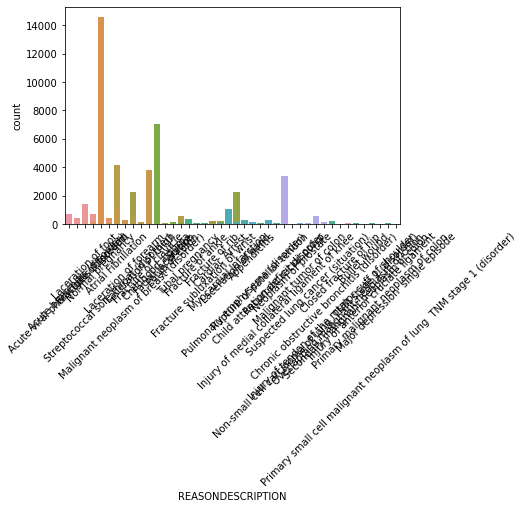

In [475]:
for name, df in data_dict.items():
    try:
        print(name)
        display(df)
        temp = df[df.REASONDESCRIPTION.isin(top_3_conditions)]
        #display(temp)
        cross_tab = pd.crosstab(temp['DESCRIPTION'], temp['REASONDESCRIPTION'])

        # display the crosstab table
        display(cross_tab)
        sns.countplot(x='REASONDESCRIPTION', data=df)
        plt.xticks(rotation=45)
        #plt.show()
    except:
        #print("")
        print(name, "has no description column")
        display(df)

# Other common pattern characteristics for the three conditions

In [476]:
encounters_df = data_dict["encounters.csv"]
encounters_top_3 = encounters_df[encounters_df.REASONDESCRIPTION.isin(top_3_conditions)]
encounters_top_3
#print(encounters_df["ENCOUNTERCLASS"].unique())

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
7,9d35ec9f-352a-4629-92ef-38eae38437e7,2011-08-10 00:26:23+00:00,2011-08-10T00:41:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,4d71f845-a6a9-3c39-b242-14d25ef86a8d,ambulatory,185345009,Encounter for symptom,129.16,129.16,64.16,444814009.0,Viral sinusitis (disorder)
8,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,2011-11-17 00:26:23+00:00,2011-11-17T00:41:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,4d71f845-a6a9-3c39-b242-14d25ef86a8d,ambulatory,185345009,Encounter for symptom,129.16,129.16,64.16,195662009.0,Acute viral pharyngitis (disorder)
10,e1ab4933-07a1-49f0-b4bd-05500919061d,2011-05-13 12:58:08+00:00,2011-05-13T13:13:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,d47b3510-2895-3b70-9897-342d681c769d,ambulatory,185345009,Encounter for symptom,129.16,129.16,49.16,10509002.0,Acute bronchitis (disorder)
12,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,2011-02-07 03:04:34+00:00,2011-02-07T03:34:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,27379046-608b-32f0-9df7-8c833cf5d11d,12b801f8-7b4e-369e-80b9-4205c25aab0f,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,185345009,Encounter for symptom,129.16,129.16,69.16,195662009.0,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53270,7887e57a-dce6-48a1-9aac-bae2a809c77f,2002-04-15 17:27:52+00:00,2002-04-15T17:46:52Z,6d048a56-edb8-4f29-891d-7a84d75a8e78,3bd5eda0-16da-3ba5-8500-4dfd6ae118b8,40d7ff6c-5040-39aa-a876-19f1ccc6740c,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,185345009,Encounter for symptom,129.16,129.16,89.16,10509002.0,Acute bronchitis (disorder)
53299,d640e83d-39ce-4451-9705-93a3f3fa4076,1935-08-10 17:27:52+00:00,1935-08-10T18:12:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,3bd5eda0-16da-3ba5-8500-4dfd6ae118b8,40d7ff6c-5040-39aa-a876-19f1ccc6740c,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,424441002,Prenatal initial visit,129.16,129.16,69.16,72892002.0,Normal pregnancy
53329,ee051b0f-1206-452f-af0d-ff54256a10db,1957-01-05 17:27:52+00:00,1957-01-05T18:12:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,7fb56531-86bd-3e4a-8619-4df9942da309,1b75d7a2-3964-340e-b025-c5e2d3506244,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,424441002,Prenatal initial visit,129.16,129.16,54.16,72892002.0,Normal pregnancy
53335,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,2010-11-18 17:27:52+00:00,2010-11-18T17:42:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,7fb56531-86bd-3e4a-8619-4df9942da309,1b75d7a2-3964-340e-b025-c5e2d3506244,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,185345009,Encounter for symptom,129.16,129.16,89.16,444814009.0,Viral sinusitis (disorder)


## Ambulatory means that they are able to walk when being treated for the illness and they usually do not stay over night

In [477]:
imaging_df = data_dict["imaging_studies.csv"]

In [478]:
imaging_df.BODYSITE_DESCRIPTION.unique()

array(['Arm', 'Wrist', 'Clavicle', 'Ankle', 'Chest', 'Knee',
       'Thoracic structure (body structure)', 'thoracic', 'Thoracic',
       'Thoracic structure', 'Pelvis',
       'Structure of right upper quadrant of abdomen'], dtype=object)

In [479]:
patients = encounters_top_3.PATIENT

In [480]:
patients_top_3 = conditions_df[conditions_df.DESCRIPTION.isin(top_3_conditions)].PATIENT

In [481]:
allergies_df = data_dict["allergies.csv"]
allergies_df

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen
...,...,...,...,...,...,...
592,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,418689008,Allergy to grass pollen
593,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,419263009,Allergy to tree pollen
594,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,91930004,Allergy to eggs
595,2000-01-03,NaN,e6ff4bf9-09c2-4976-aa84-cca142207cf8,6c760807-a6b7-4af4-8d50-f32325803448,91935009,Allergy to peanuts


In [482]:
immunization_df = data_dict["immunizations.csv"]
immunization_df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,140,Influenza seasonal injectable preservative ...,140.52
1,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,140,Influenza seasonal injectable preservative ...,140.52
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,140,Influenza seasonal injectable preservative ...,140.52
3,2011-11-26T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1923c698-accd-4d70-ba09-e1938f6e96d1,140,Influenza seasonal injectable preservative ...,140.52
4,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,140,Influenza seasonal injectable preservative ...,140.52
...,...,...,...,...,...,...
15473,2011-05-28T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,9159cac1-2310-4e53-81eb-aa08d6e3537d,140,Influenza seasonal injectable preservative ...,140.52
15474,2012-06-02T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,d015ae93-6fb8-4a19-9109-543f527a6878,140,Influenza seasonal injectable preservative ...,140.52
15475,2013-06-08T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,f4d4f19e-6377-4627-8a6f-760beba1fc6b,140,Influenza seasonal injectable preservative ...,140.52
15476,2014-06-14T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,e9dfe071-cf14-4d7f-8c8a-879497541f2d,140,Influenza seasonal injectable preservative ...,140.52


In [483]:
for condition in top_3_conditions:
    patients = conditions_df[conditions_df.DESCRIPTION == condition].PATIENT
    allergies = allergies_df[allergies_df.PATIENT.isin(patients)]
    immunization = immunization_df[immunization_df.PATIENT.isin(patients)]
    print("\n")
    print(condition, "\n")
    print("Allergies")
    print(allergies.DESCRIPTION.unique())
    print("Immunization")
    print(immunization.DESCRIPTION.unique())



Viral sinusitis (disorder) 

Allergies
['Latex allergy' 'Shellfish allergy' 'Allergy to mould'
 'Dander (animal) allergy' 'Allergy to grass pollen'
 'Allergy to tree pollen' 'Allergy to soya' 'Allergy to fish'
 'House dust mite allergy' 'Allergy to wheat' 'Allergy to peanuts'
 'Allergy to bee venom' 'Allergy to dairy product' 'Allergy to nut'
 'Allergy to eggs']
Immunization
['Influenza  seasonal  injectable  preservative free'
 'Td (adult) preservative free' 'Hep B  adult' 'meningococcal MCV4P'
 'Hep A  adult' 'Tdap' 'HPV  quadrivalent' 'zoster'
 'Pneumococcal conjugate PCV 13' 'Hep A  ped/adol  2 dose' 'varicella'
 'IPV' 'DTaP' 'MMR' 'Hep B  adolescent or pediatric' 'Hib (PRP-OMP)'
 'rotavirus  monovalent' 'pneumococcal polysaccharide vaccine  23 valent']


Acute viral pharyngitis (disorder) 

Allergies
['Latex allergy' 'Shellfish allergy' 'Allergy to mould'
 'Dander (animal) allergy' 'Allergy to grass pollen'
 'Allergy to tree pollen' 'Allergy to soya' 'Allergy to fish'
 'House du

In [484]:
np.unique(observations_df.VALUE)

array([  0. ,   1. ,   2. ,   3. ,   4.2,   4.4,   4.6,   9.2,   9.5,
        12. ,  12.1,  12.3,  13. ,  13.1,  15. ,  27.7,  28. ,  29.3,
        29.6,  31. ,  32. ,  32.4,  33. ,  33.9,  34. ,  34.2,  35. ,
        36. ,  37. ,  37.1,  37.9,  38. ,  39. ,  40. ,  40.1,  42.4,
        45. ,  45.7,  66.9,  69.3,  70. ,  73.8,  74. ,  77.4,  78.2,
        79.7,  80. ,  83. ,  84. ,  86.3,  86.9,  87. ,  87.4, 101.8,
       127. , 136.8, 162.5, 174.1, 176.4, 225.3, 238.5, 259. , 440.7])

In [485]:
observations_df[observations_df.VALUE == "Never smoker"]

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE


In [486]:
observations_df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
8,2011-11-17 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,8310-5,Body temperature,37.1,Cel,numeric
58,2012-08-12 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,8302-2,Body Height,162.5,cm,numeric
60,2012-08-12 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
62,2012-08-12 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,29463-7,Body Weight,77.4,kg,numeric
64,2012-08-12 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,39156-5,Body Mass Index,29.3,kg/m2,numeric
...,...,...,...,...,...,...,...,...
431,2015-05-28 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric
432,2016-05-28 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric
434,2017-05-28 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric
436,2018-05-28 00:26:23+00:00,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,NaN,QOLS,QOLS,1.0,{score},numeric


In [487]:
conditions_df["duration"] = pd.to_datetime(conditions_df["STOP"])-pd.to_datetime(conditions_df["START"])
conditions_df

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,duration
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),NaT
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),7 days
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),10 days
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder),14 days
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder),8 days
...,...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),NaT
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),NaT
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,NaT
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder),7 days


In [488]:
conditions_df.groupby("DESCRIPTION")["duration"].count()

DESCRIPTION
Acute allergic reaction                   19
Acute bacterial sinusitis (disorder)      68
Acute bronchitis (disorder)              562
Acute viral pharyngitis (disorder)       650
Alcoholism                                 0
                                        ... 
Suspected lung cancer (situation)          0
Tear of meniscus of knee                   6
Tubal pregnancy                            4
Viral sinusitis (disorder)              1242
Whiplash injury to neck                   55
Name: duration, Length: 129, dtype: int64

In [489]:
conditions_df.groupby("DESCRIPTION")["duration"].sum()

DESCRIPTION
Acute allergic reaction                    4 days
Acute bacterial sinusitis (disorder)    4166 days
Acute bronchitis (disorder)             5854 days
Acute viral pharyngitis (disorder)      6449 days
Alcoholism                                 0 days
                                          ...    
Suspected lung cancer (situation)          0 days
Tear of meniscus of knee                 300 days
Tubal pregnancy                         8316 days
Viral sinusitis (disorder)             17321 days
Whiplash injury to neck                 1547 days
Name: duration, Length: 129, dtype: timedelta64[ns]

In [490]:
conditions_df

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,duration
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),NaT
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),7 days
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),10 days
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder),14 days
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder),8 days
...,...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),NaT
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),NaT
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,NaT
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder),7 days


In [491]:
conditions_df["START"] = pd.to_datetime(conditions_df["START"])
conditions_df["START"].dt.month

0        5
1        8
2       11
3        5
4        2
        ..
8371    12
8372     8
8373     8
8374    11
8375     4
Name: START, Length: 8376, dtype: int64

In [492]:
import calendar
month_names = [calendar.month_name[i] for i in range(1, 13)]
month_names = [calendar.month_name[i] for i in range(1, 13)]

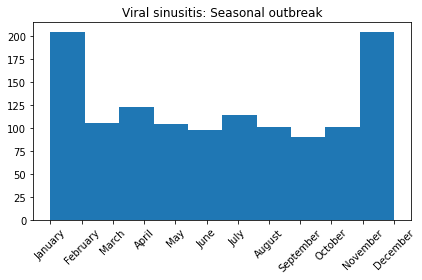

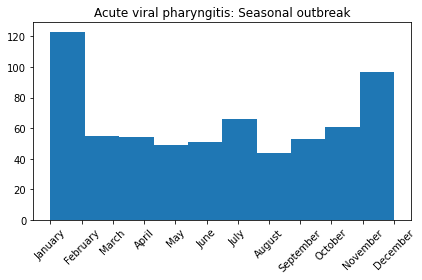

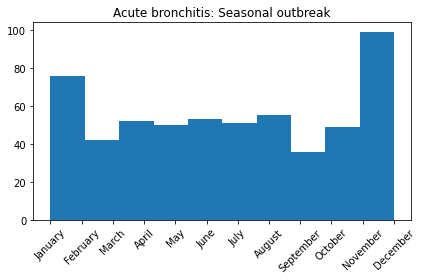

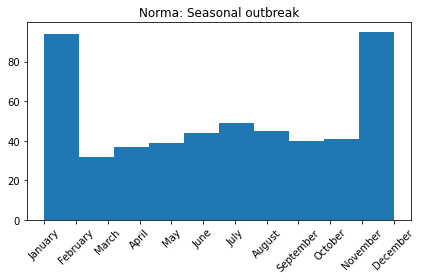

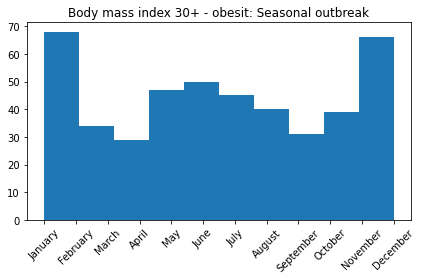

In [493]:
for c in top_3_conditions:
    temp = conditions_df[conditions_df.DESCRIPTION == c]
    months = temp["START"].dt.month
    plt.hist(months)
    plt.title(c[:-11] + ": Seasonal outbreak")
    plt.xticks(range(1, 13), month_names, rotation=45)
    plt.tight_layout()
    
    plt.savefig(c+".png")
    plt.show()

In [494]:
conditions_df["START"]

0      2001-05-01
1      2011-08-09
2      2011-11-16
3      2011-05-13
4      2011-02-06
          ...    
8371   1984-12-29
8372   1988-08-24
8373   2009-08-08
8374   2010-11-18
8375   2012-04-23
Name: START, Length: 8376, dtype: datetime64[ns]

In [495]:
top_3_conditions

Index(['Viral sinusitis (disorder)', 'Acute viral pharyngitis (disorder)',
       'Acute bronchitis (disorder)', 'Normal pregnancy',
       'Body mass index 30+ - obesity (finding)'],
      dtype='object')

In [496]:
count = conditions_df.groupby("DESCRIPTION")["duration"].count()
count[top_3_conditions]

Viral sinusitis (disorder)                 1242
Acute viral pharyngitis (disorder)          650
Acute bronchitis (disorder)                 562
Normal pregnancy                            493
Body mass index 30+ - obesity (finding)       0
Name: duration, dtype: int64

In [497]:
avg_duration = conditions_df.groupby("DESCRIPTION")["duration"].sum()/conditions_df.groupby("DESCRIPTION")["duration"].count()
avg_duration[top_3_conditions]

Viral sinusitis (disorder)                 13 days 22:42:19.130434782
Acute viral pharyngitis (disorder)          9 days 22:07:00.923076923
Acute bronchitis (disorder)                10 days 09:59:34.377224199
Normal pregnancy                          142 days 00:29:12.535496957
Body mass index 30+ - obesity (finding)                           NaT
Name: duration, dtype: timedelta64[ns]

In [498]:
np.unique(observations_df[observations_df.DESCRIPTION == "Tobacco smoking status NHIS"].VALUE)

array([], dtype=float64)

In [499]:
observations_df.DESCRIPTION.unique()

array(['Body temperature', 'Body Height',
       'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
       'Body Weight', 'Body Mass Index', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart rate', 'Respiratory rate',
       'Total Cholesterol', 'Triglycerides',
       'Low Density Lipoprotein Cholesterol',
       'High Density Lipoprotein Cholesterol',
       'Leukocytes [#/volume] in Blood by Automated count',
       'Erythrocytes [#/volume] in Blood by Automated count',
       'Hemoglobin [Mass/volume] in Blood',
       'Hematocrit [Volume Fraction] of Blood by Automated count',
       'MCV [Entitic volume] by Automated count',
       'MCH [Entitic mass] by Automated count',
       'MCHC [Mass/volume] by Automated count',
       'Erythrocyte distribution width [Entitic volume] by Automated count',
       'Platelets [#/volume] in Blood by Automated count',
       'Platelet distribution width [Entitic volume] in Blood by Automated count',
       'Plate

In [500]:
conditions_df[conditions_df.PATIENT == "00185faa-2760-4218-9bf5-db301acf8274"]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,duration
5451,2012-08-03,2012-08-11,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,195662009,Acute viral pharyngitis (disorder),8 days
5452,2012-10-14,2012-10-25,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,43878008,Streptococcal sore throat (disorder),11 days
5453,2017-12-21,NaN,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,82423001,Chronic pain,NaT
5454,2018-10-18,NaN,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,124171000119105,Chronic intractable migraine without aura,NaT
5455,2019-09-07,NaN,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,196416002,Impacted molars,NaT


In [501]:
categorical_values_index

Int64Index([    20,     37,     49,     69,     90,    113,    116,    132,
               136,    160,
            ...
            299551, 299560, 299580, 299593, 299602, 299611, 299624, 299644,
            299653, 299666],
           dtype='int64', length=21209)

In [502]:
observations_df = data_dict["observations.csv"].copy()
# categorical_values_index = observations_df[observations_df.TYPE=="text"].index
# observations_df = observations_df.drop(observations_df[observations_df.TYPE=="text"].index)
# observations_df["VALUE"] = pd.to_numeric(observations_df["VALUE"])
# observations_agg = observations_df.groupby(['PATIENT', 'DESCRIPTION'])['VALUE'].mean().reset_index()

# observations_pivot = observations_agg.pivot(index='PATIENT', columns='DESCRIPTION', values='VALUE')
# observations_pivot.fillna(0, inplace=True)
# #display(observations_pivot)

# observations_pivot["Leukocytes [#/volume] in Blood by Automated count"]


#display(observations_df[observations_df.PATIENT == "00185faa-2760-4218-9bf5-db301acf8274"].drop_duplicates(subset=['PATIENT', 'DESCRIPTION']))
#observations_agg = observations_df.groupby(['PATIENT', 'DESCRIPTION'])['VALUE'].mean().reset_index()
#display(observations_df[observations_df.PATIENT == "00185faa-2760-4218-9bf5-db301acf8274"])
# observations_df.drop_duplicates(subset=['PATIENT', 'DESCRIPTION'], inplace=True)
# #observations_df = observations_df.drop(observations_df[observations_df.DESCRIPTION=="Tobacco smoking status NHIS"].index)
# #observations_df = observations_df.drop(observations_df[observations_df.VALUE=="Never smoker"].index)
# #observations_df["VALUE"] = pd.to_numeric(observations_df["VALUE"])
# #observations_df['DATE'] = pd.to_datetime(observations_df['DATE'])
# pivot_df = observations_df.pivot(index='PATIENT', columns='DESCRIPTION', values='VALUE')
# pivot_df

In [503]:
np.unique(observations_df[observations_df.TYPE=="text"].VALUE)

array(['Blood in urine (finding)', 'Brown color (qualifier value)',
       'Cloudy urine (finding)', 'Current every day smoker',
       'Finding of bilirubin in urine (finding)', 'Former smoker',
       'Foul smelling urine (finding)', 'HIV positive',
       'Improving (qualifier value)', 'M0 category (finding)',
       'M1 category (finding)', 'N0 category (finding)',
       'N1 category (finding)', 'N2 category (finding)',
       'N3 category (finding)', 'Negative (qualifier value)',
       'Never smoker', 'No', 'No signs/symptoms',
       'Non-small cell lung cancer (disorder)', 'None (qualifier value)',
       'Normal size prostate', 'Overlapping malignant neoplasm of colon',
       'Patient is homeless', 'Positive (qualifier value)',
       'Prostate enlarged on PR', 'Reddish color urine',
       'Severe signs/symptoms', 'Stage 1 (qualifier value)',
       'Stage 1A (qualifier value)', 'Stage 2 (qualifier value)',
       'Stage 2A (qualifier value)', 'Stage 2B (qualifier value)',


In [504]:
patients_top_3 = conditions_df[conditions_df.DESCRIPTION.isin(top_3_conditions)]
patients_top_3 = patients_top_3[["PATIENT", "DESCRIPTION"]].reset_index(drop=True)
patients_top_3 = patients_top_3.drop_duplicates(subset="PATIENT")
patients_top_3

,PATIENT,DESCRIPTION
0,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,Viral sinusitis (disorder)
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,Acute bronchitis (disorder)
3,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,Acute viral pharyngitis (disorder)
7,1d604da9-9a81-4ba9-80c2-de3375d59b40,Viral sinusitis (disorder)
8,034e9e3b-2def-4559-bb2a-7850888ae060,Acute bronchitis (disorder)
...,...,...
3417,023a7d29-32b3-4db5-89c8-b88bd7582ec0,Viral sinusitis (disorder)
3421,1fc8dafd-90e5-44d6-9179-81156c0ea083,Viral sinusitis (disorder)
3423,6d048a56-edb8-4f29-891d-7a84d75a8e78,Body mass index 30+ - obesity (finding)
3426,fca3178e-fb68-41c3-8598-702d3ca68b96,Body mass index 30+ - obesity (finding)


In [505]:
observations_df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
299692,2015-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299693,2016-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299694,2017-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299695,2018-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric


In [506]:
len(patients_top_3.PATIENT)

1076

In [507]:
k = 0
nbr_former_smokers = 0
nbr_current_smoker = 0
nbr_never_smoker = 0
for p in patients_top_3.PATIENT:
    temp = observations_df[(observations_df.PATIENT==p) & (observations_df.DESCRIPTION == "Tobacco smoking status NHIS")]
    if "Current every day smoker" in temp.values:
        nbr_current_smoker += 1
    elif "Former smoker" in temp.values:
        nbr_former_smokers += 1
    elif "Never smoker" in temp.values:
        nbr_never_smoker += 1

print(nbr_current_smoker, nbr_former_smokers, nbr_never_smoker)

    

22 271 783


In [508]:
conditions_df[conditions_df.DESCRIPTION == condition].PATIENT

23      b58731cc-2d8b-4c2d-b327-4cab771af3ef
63      76982e06-f8b8-4509-9ca3-65a99c8650fe
75      e4f1bd35-93ae-418b-b8cf-d39c3fbb069c
89      86b97fc7-ae8f-4e0d-8e66-db68f36e7a76
96      1c591f0d-95b1-4289-94a9-9713ab3834e7
                        ...                 
8314    30d83f4d-837c-488d-9748-5ee0fa49edd5
8326    6c2b1cfd-887a-43f8-bee0-000ce2fc6ef0
8331    09867b02-24b8-4896-b38b-86782dd64ef1
8349    6d048a56-edb8-4f29-891d-7a84d75a8e78
8360    fca3178e-fb68-41c3-8598-702d3ca68b96
Name: PATIENT, Length: 449, dtype: object

In [ ]:
factors = ['Respiratory rate', 'Pain severity - 0-10 verbal numeric rating [Score] - Reported', 'Body temperature', 'Leukocytes [#/volume] in Blood by Automated count']
#regular.columns[1:10]
for column in factors:
    for condition in top_3_conditions:
        patients  = conditions_df[conditions_df.DESCRIPTION == condition].PATIENT
        a = regular[regular.PATIENT.isin(patients)][column]
        plt.hist(a)
        plt.title(condition + " " + column,)
        plt.show()